In [ ]:
What is Customer Churn?
#Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.
#Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.
#Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. 
#The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. 
#The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.
#Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

# To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import and warehouse data

In [2]:
tel = pd.read_csv('C:\\Users\\91879\\Desktop\\TelcomCustomer-Churn_1.csv')
tel

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


In [3]:
tel.size

70430

In [4]:
tel.shape

(7043, 10)

In [5]:
tel1 = pd.read_csv("C:\\Users\\91879\\Desktop\\TelcomCustomer-Churn_2.csv")
tel1

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
tel1.size

77473

In [7]:
tel1.shape

(7043, 11)

In [8]:
tel2 = pd.read_csv('C:\\Users\\91879\\Desktop\\TelcomCustomer-Churn.csv')
tel2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
tel2.size

147903

In [10]:
tel2.shape

(7043, 21)

In [11]:
tel2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 2. Data Cleaning

In [12]:
tel2.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# The features are 18 categorical variables and 3 continuous variables, 

In [14]:
tel2['TotalCharges'] = tel2['TotalCharges'].replace(" ",0)
tel2['TotalCharges'] = pd.to_numeric(tel2.TotalCharges)

In [15]:
for features in tel2.columns:
    print(tel2[features].unique())
  

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [16]:
# I've checked the unique categorical values for all features and they are proper(no
# other data apart from related) 

In [17]:
tel2.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
tel2.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [19]:
tel2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
# There is no missing data in the dataframe

In [189]:
tel2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int32  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int32  
 3   Dependents                             7043 non-null   int32  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int32  
 6   PaperlessBilling                       7043 non-null   int32  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   object 
 10  MultipleLines_No phone service         7043 non-null   uint8  
 11  Mult

#### Data analysis and visualisation

In [191]:
tel2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.00,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
MultipleLines_No phone service,7043.0,0.096834,0.295752,0.00,0.00,0.00,0.00,1.00


### Data preprocessinng

In [22]:
tel2 = tel2.drop('customerID', axis = 1)
tel2 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [23]:
tel2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
tel2=pd.get_dummies(tel2, columns = ['MultipleLines','InternetService','Contract','PaymentMethod','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],drop_first = True )
tel2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,Female,0,Yes,No,1,No,Yes,29.85,29.85,No,...,0,1,0,0,0,0,0,0,0,0
1,Male,0,No,No,34,Yes,No,56.95,1889.50,No,...,0,0,0,1,0,0,0,0,0,0
2,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes,...,0,1,0,0,0,0,0,0,0,0
3,Male,0,No,No,45,No,No,42.30,1840.75,No,...,0,0,0,1,0,1,0,0,0,0
4,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,84.80,1990.50,No,...,0,0,0,1,0,1,0,1,0,1
7039,Female,0,Yes,Yes,72,Yes,Yes,103.20,7362.90,No,...,0,1,0,1,0,0,0,1,0,1
7040,Female,0,Yes,Yes,11,No,Yes,29.60,346.45,No,...,0,0,0,0,0,0,0,0,0,0
7041,Male,1,Yes,No,4,Yes,Yes,74.40,306.60,Yes,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tel2['gender'] = le.fit_transform(tel2['gender'])
tel2['Partner'] = le.fit_transform(tel2['Partner'])
tel2['Dependents'] = le.fit_transform(tel2['Dependents'])
tel2['PhoneService'] = le.fit_transform(tel2['PhoneService'])
tel2['PaperlessBilling'] = le.fit_transform(tel2['PaperlessBilling'])

In [26]:
tel2['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [27]:
# the target 'churn' is imbalanced

In [28]:
X = tel2.drop('Churn',axis = 1)
y = tel2['Churn']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier()

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_prediction = model.predict(X_test)

In [35]:
y_test

185     Yes
2715     No
3825     No
1807    Yes
132      No
       ... 
5522    Yes
6377    Yes
5500     No
2392     No
6705     No
Name: Churn, Length: 2113, dtype: object

In [36]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [37]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

          No       0.82      0.82      0.82      1539
         Yes       0.51      0.51      0.51       574

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.66      2113
weighted avg       0.73      0.74      0.74      2113



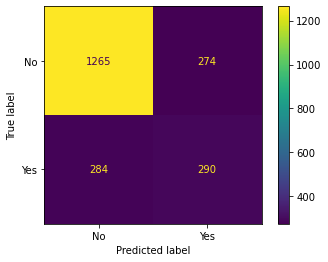

In [38]:
plot_confusion_matrix(model,X_test,y_test)

In [39]:
model.feature_importances_

array([0.02156437, 0.0201068 , 0.01856266, 0.02110039, 0.20799575,
       0.00367899, 0.02265076, 0.19201157, 0.19859406, 0.0018523 ,
       0.01501744, 0.1026991 , 0.        , 0.01180905, 0.00878626,
       0.01738655, 0.02416376, 0.01369839, 0.        , 0.02868209,
       0.        , 0.01278872, 0.        , 0.01542688, 0.        ,
       0.01103649, 0.        , 0.00725036, 0.01202345, 0.01111382])

In [40]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [41]:
from sklearn.tree import plot_tree

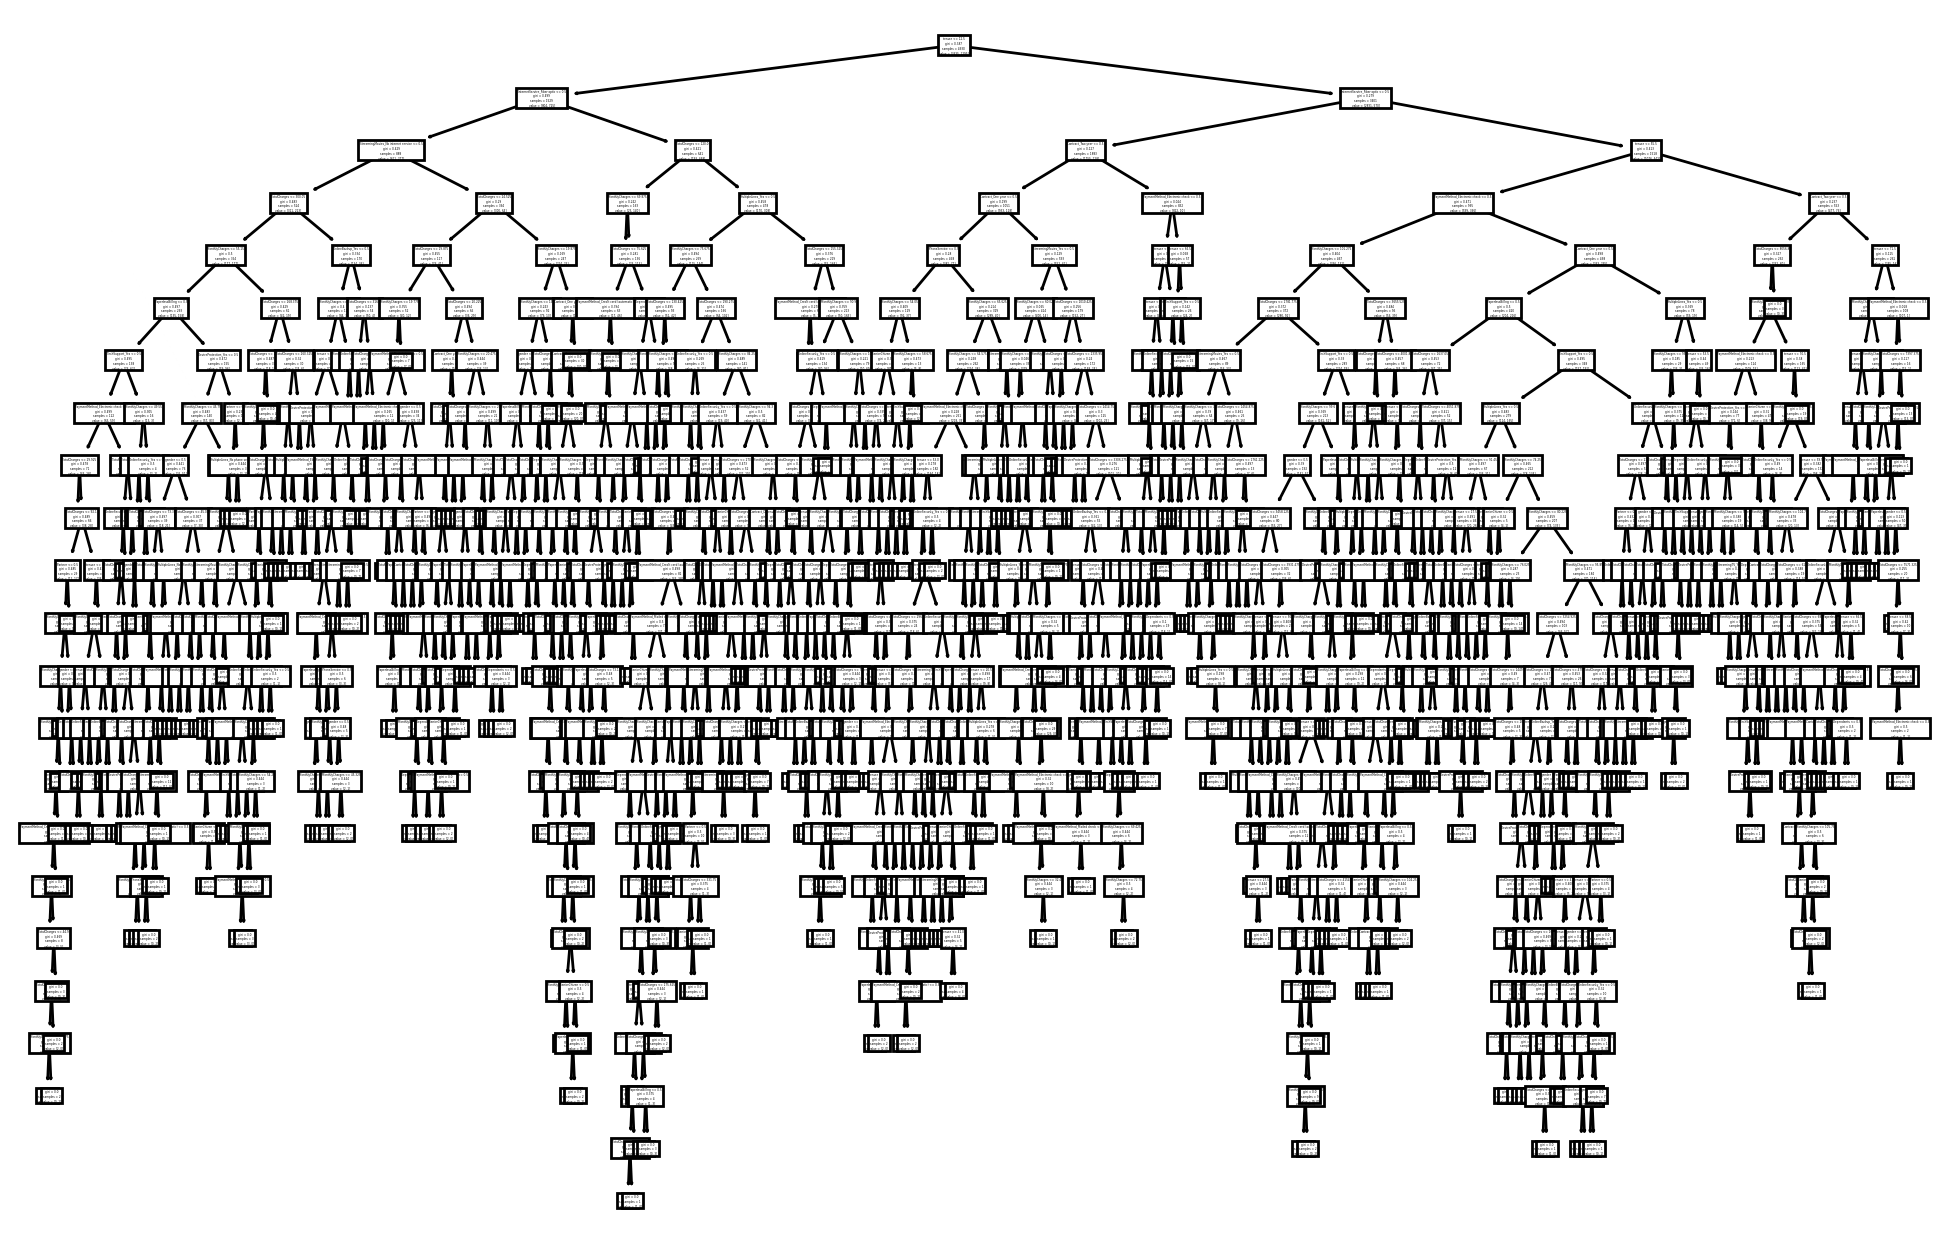

In [42]:
plt.figure(figsize = (12,8), dpi = 200)
plot_tree(model, feature_names = X.columns);

In [43]:
def report_model(model):
    y_prediction = model.predict(X_test)
    print(classification_report(y_test,y_prediction ))
    print('\n')
    plt.figure(figsize = (12,8), dpi = 200)
    plot_tree(model, feature_names = X.columns, filled = True);


              precision    recall  f1-score   support

          No       0.82      0.82      0.82      1539
         Yes       0.51      0.51      0.51       574

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.66      2113
weighted avg       0.73      0.74      0.74      2113





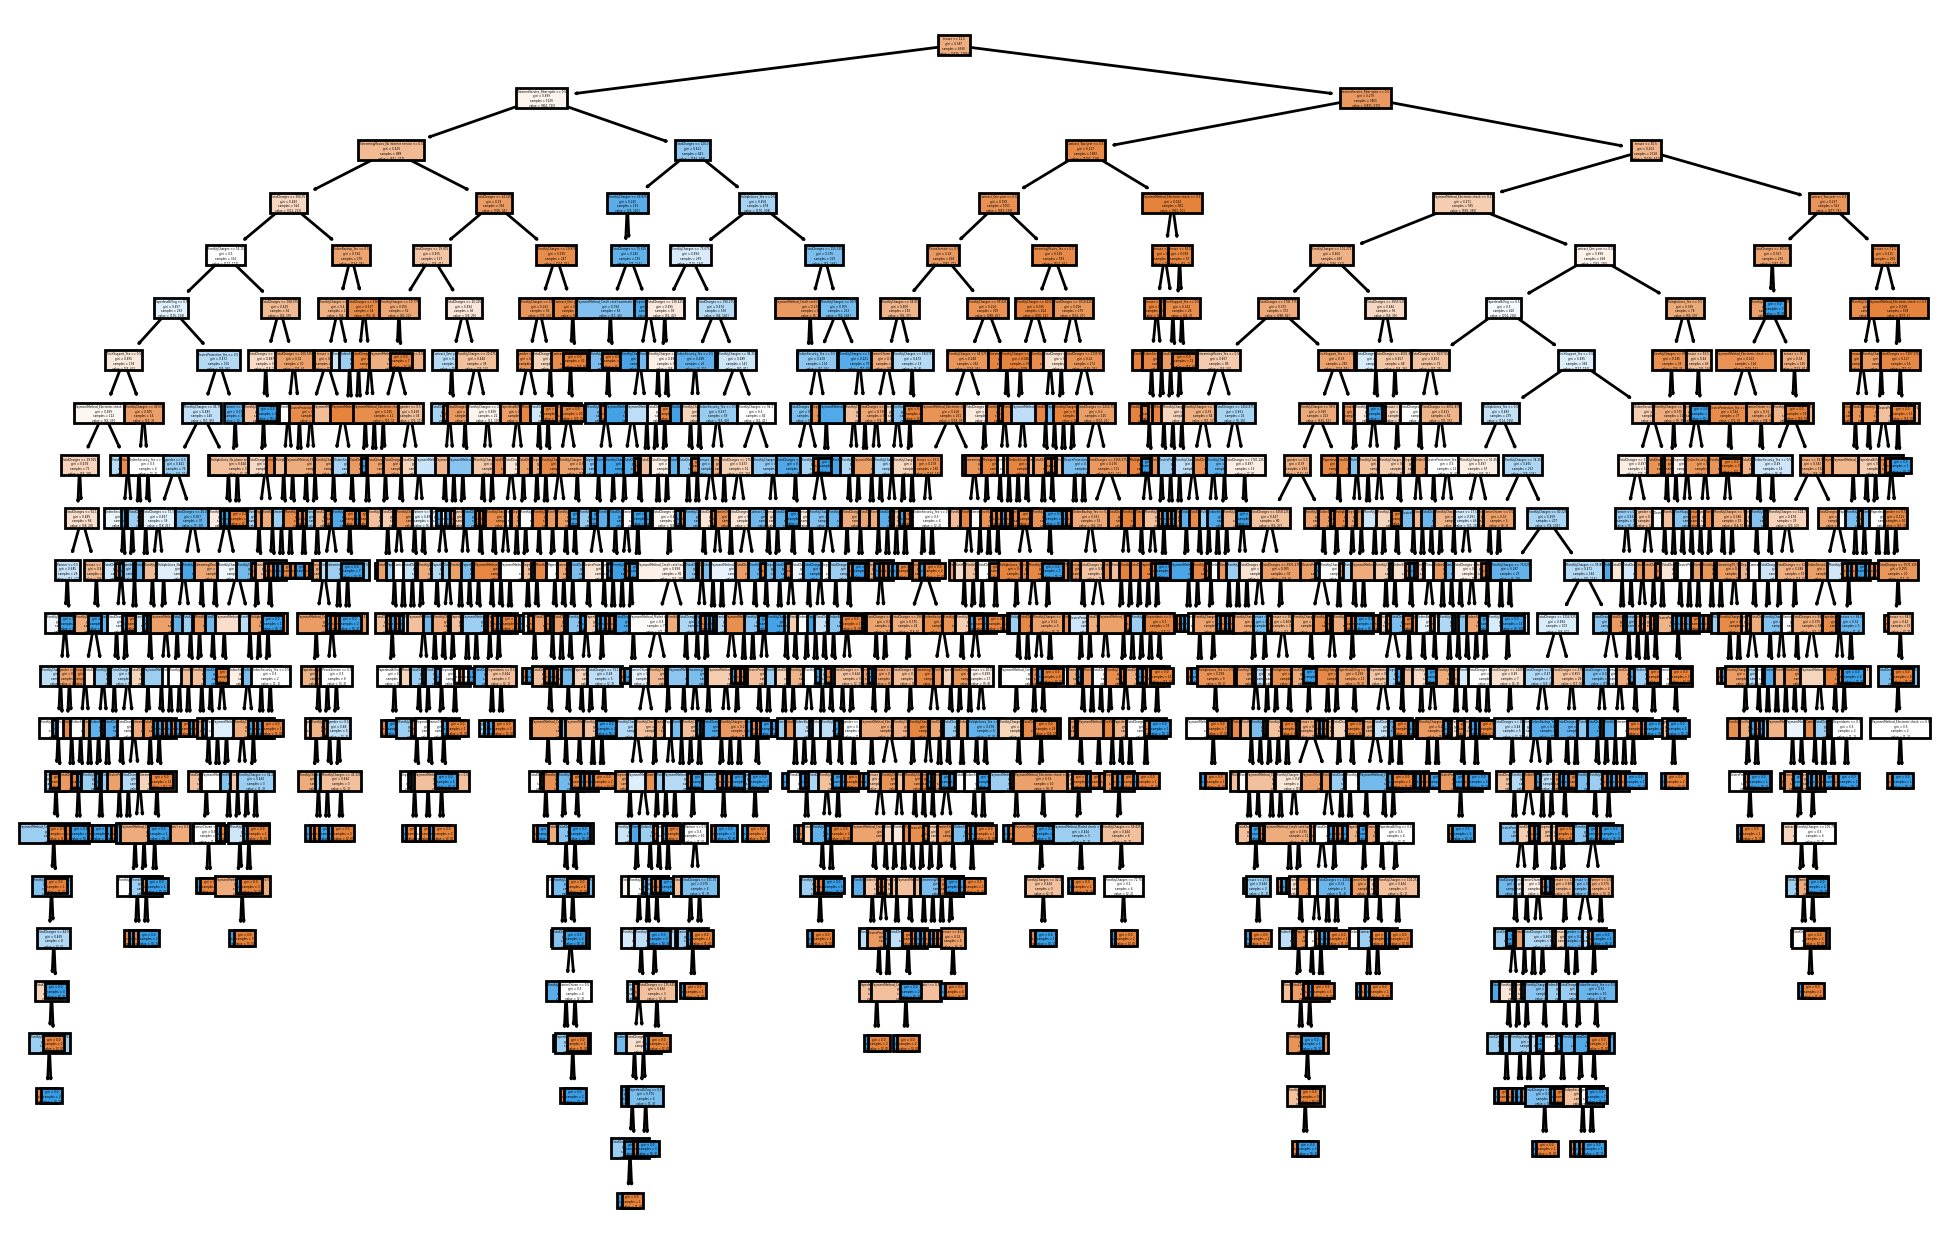

In [44]:
report_model(model)

In [45]:
pruned_tree = DecisionTreeClassifier(max_depth = 6,max_leaf_nodes = 10)

In [46]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10)

              precision    recall  f1-score   support

          No       0.79      0.94      0.86      1539
         Yes       0.70      0.34      0.46       574

    accuracy                           0.78      2113
   macro avg       0.75      0.64      0.66      2113
weighted avg       0.77      0.78      0.75      2113





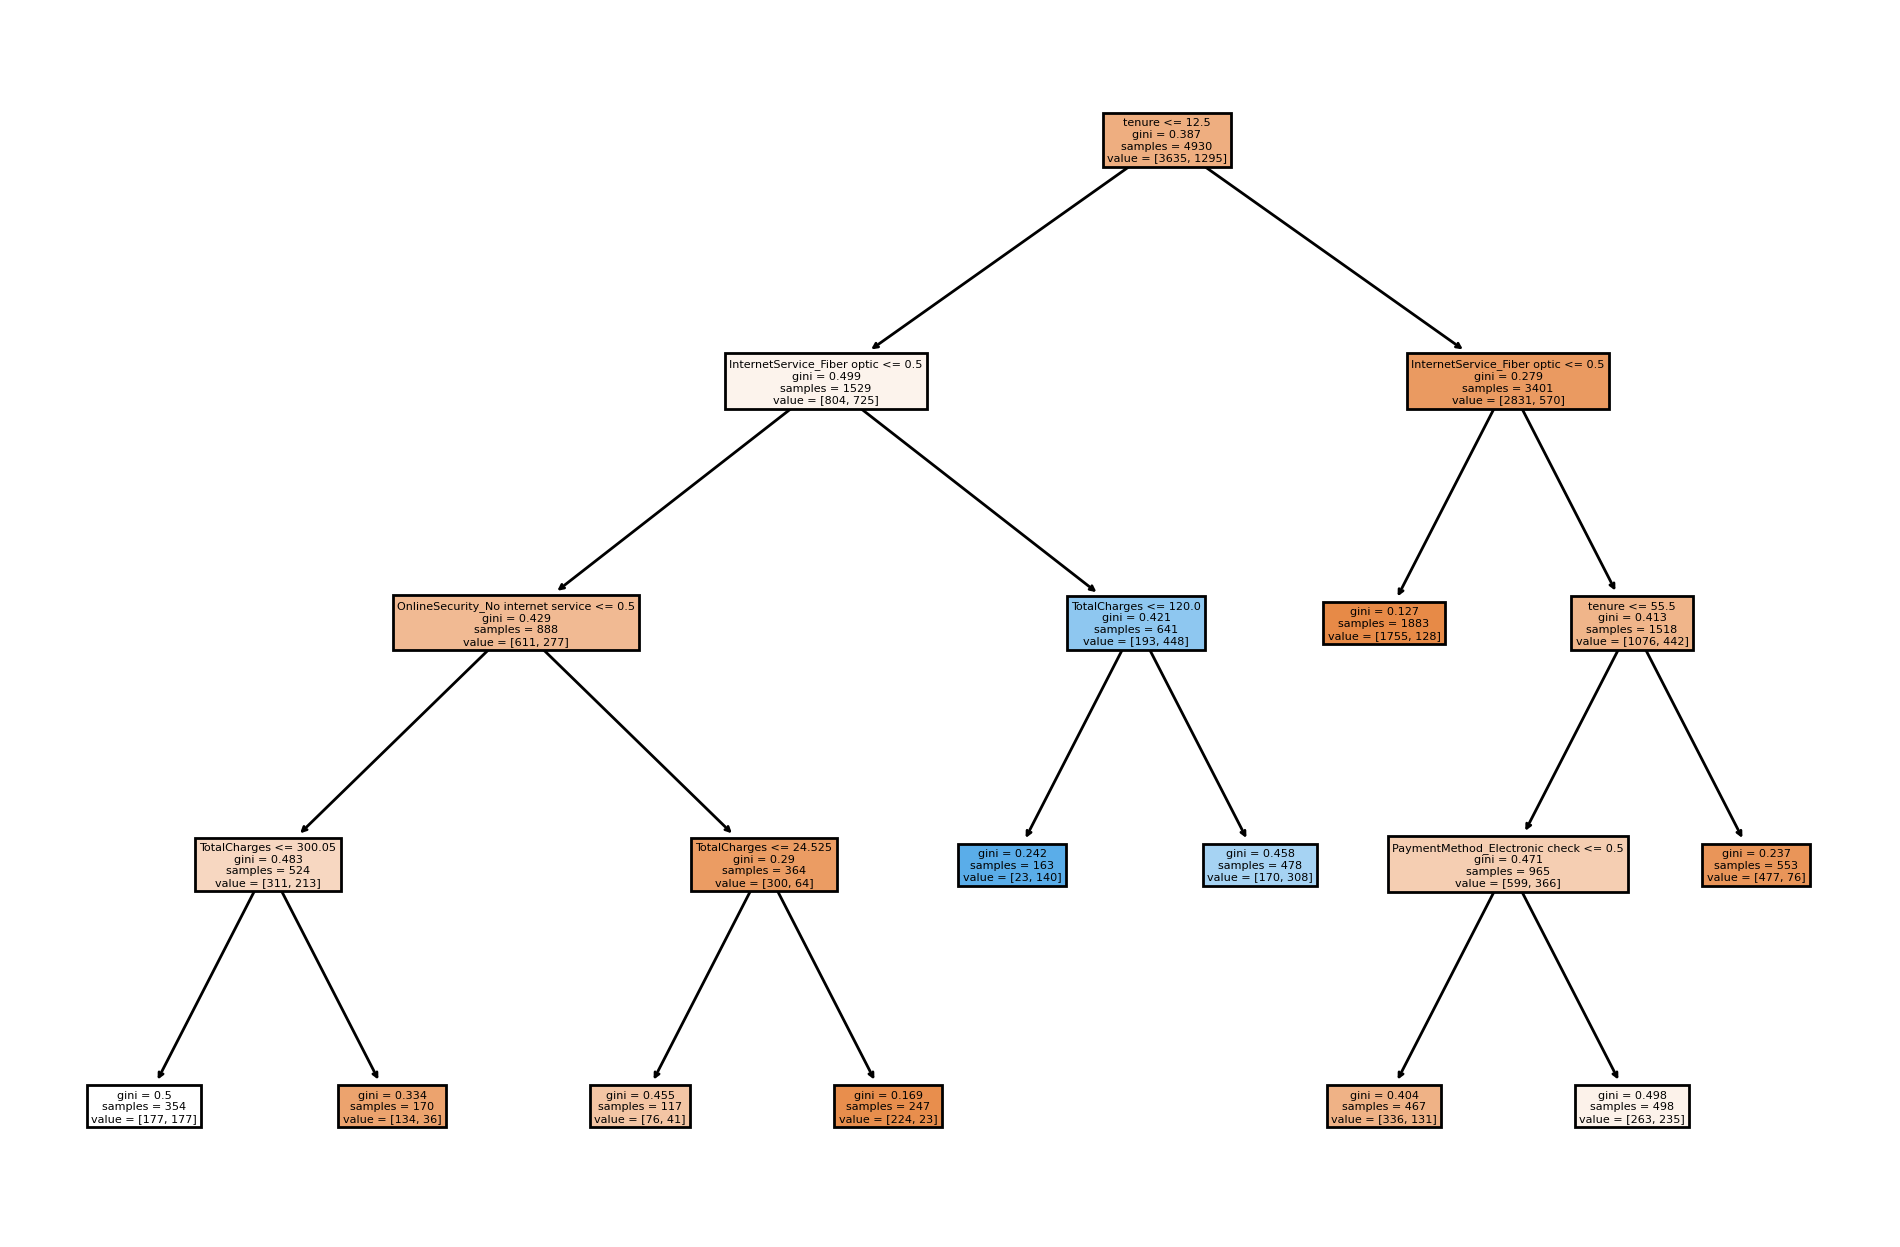

In [47]:
report_model(pruned_tree)

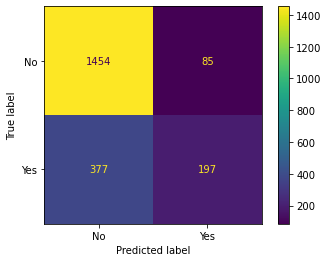

In [48]:
plot_confusion_matrix(pruned_tree, X_test, y_test);

In [49]:
model.score(X_train,y_train)

0.9983772819472616

In [50]:
model.score(X_test, y_test)

0.7359204921911974

In [51]:
pruned_tree.score(X_train, y_train)

0.7890466531440162

In [52]:
pruned_tree.score(X_test, y_test)

0.7813535257927118

### decision tree model has high amount of overfitting and hence reduces accuracy. after pruning accuracy has increased and there is well balance between test and train score.

### Random forest tree

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
n_estimators = [64,100, 128, 200]

In [57]:
max_features = [4,5,6]

In [58]:
bootstrap = [True, False]

In [59]:
oob_score = [True, False]

In [60]:
param_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'bootstrap': bootstrap,
               'oob_score': oob_score}

In [61]:
rfc = RandomForestClassifier()

In [62]:
grid = GridSearchCV(rfc, param_grid)

In [63]:
grid.fit(X_train, y_train)

C:\Users\91879\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91879\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91879\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91879\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91879\anaconda

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [4, 5, 6],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [64]:
grid.best_params_

{'bootstrap': True, 'max_features': 6, 'n_estimators': 128, 'oob_score': False}

In [65]:
rfc = RandomForestClassifier(n_estimators = 200, max_features = 6, bootstrap = True, oob_score = True )

In [66]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_estimators=200, oob_score=True)

In [67]:
rfc.oob_score_

0.7872210953346856

In [68]:
y_prediction = rfc.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [71]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

          No       0.82      0.91      0.87      1539
         Yes       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [73]:
rfc.score(X_train,y_train)

0.9983772819472616

In [74]:
rfc.score(X_test,y_test)

0.7941315664931378

#### accuracy by using random forest model is somewhat better than decision tree

### Adaboost (Adaptive boosting)

In [136]:
from sklearn.ensemble import AdaBoostClassifier

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [138]:
ada = AdaBoostClassifier(n_estimators = 14)

In [139]:
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=14)

In [140]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [141]:
test_predictions = ada.predict(X_test)

In [142]:
test_predictions

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [143]:
print(classification_report(y_test, test_predictions));

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1539
         Yes       0.67      0.50      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [144]:
ada.score(X_train,y_train)

0.7977687626774848

In [145]:
ada.score(X_test,y_test)

0.7969711310932324

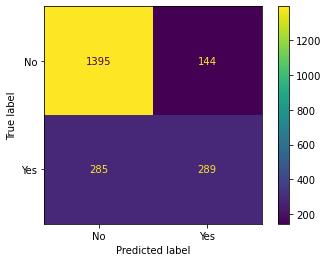

In [146]:
plot_confusion_matrix(ada, X_test, y_test);

In [151]:
ada.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.28571429,
       0.        , 0.07142857, 0.14285714, 0.        , 0.        ,
       0.        , 0.14285714, 0.        , 0.07142857, 0.07142857,
       0.        , 0.07142857, 0.        , 0.        , 0.07142857,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07142857])

In [152]:
ada.feature_importances_.argmax() # index 4 is the most important feature

4

In [153]:
X.columns[4] 

'tenure'

In [154]:
# tenure is the most important feature

In [155]:
len(X.columns)

30

In [156]:
error_rates = []

for n in range (1,31):
    ada = AdaBoostClassifier(n_estimators = n)
    ada.fit(X_train, y_train)
    y_predictions = ada.predict(X_test)
    
    err = 1 - accuracy_score(y_test, y_predictions)
    error_rates.append(err)

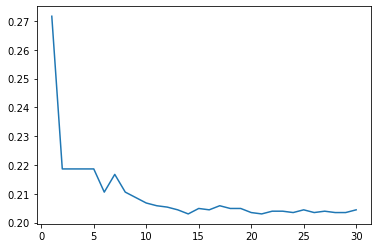

In [157]:
plt.plot(range(1,31), error_rates);

In [135]:
# there is a error rate of 27%. with increase in stumps, error rates decreases 
# as we see from graph
# upto 14 stumps there is decrease in error rates, beyond 14 stumps there is no
# appreciable decrease in error rate

#### 1. adaboost accuracy is more than random forest and decision tree model.
#### 2. there is well balance between test score and train score
#### 3. important feature is 'tenure


### Gradient boosting

In [158]:
from sklearn.ensemble import GradientBoostingClassifier

In [160]:
from sklearn.model_selection import GridSearchCV

In [166]:
gb_model = GradientBoostingClassifier()

In [169]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [171]:
y_predictions = gb_model.predict(X_test)

In [173]:
y_predictions

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [175]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [178]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1539
         Yes       0.68      0.52      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



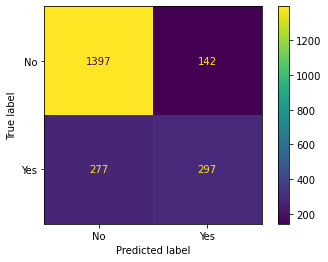

In [185]:
plot_confusion_matrix(gb_model, X_test, y_test);

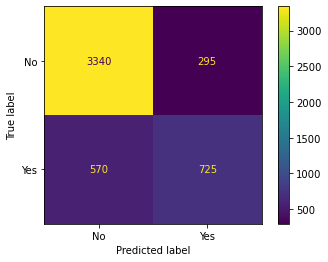

In [192]:
plot_confusion_matrix(gb_model, X_train, y_train)

In [186]:
gb_model.score(X_train, y_train)

0.8245436105476673

In [188]:
gb_model.score(X_test, y_test)

0.8017037387600567

#### Accuracy is similar to adaboost
#### there is well balance between test and train score

### Conclusions
1. import feature among all is tenure
2. accuracy is more for boosting techniques
3. there is well balanced test and train score in adaboost and gradient boosting
4. pruning the trees in decision tree has increase the accuracy and there is also a reduction in overfitting
5. overall accuracy is better in adaboost and gradient boosting than compare to decision tree and randomforest 
6. The overall misclassification for churn is 18%